In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import cartopy.crs as ccrs
from matplotlib.lines import Line2D

In [2]:
# Load the CSV file
file_path = '/Users/yubinbaaniya/Downloads/SABER_coordinate.csv'
# df = pd.read_csv(file_path, usecols=['state', 'county','latitude','longitude'])
df = pd.read_csv(file_path, usecols=['kge_corr','latitude','longitude'])

In [21]:
df

,latitude,longitude,state,county
0,-25.681250,-54.441250,Brazil,ANA
1,-3.880000,-70.446389,Peru,SENAMHI
2,-29.480000,-59.580000,Argentina,GRDC
3,50.630000,137.120000,Russia,GRDC
4,-3.306250,-60.397917,Brazil,ANA
...,...,...,...,...
12811,-1.933750,-55.519583,Brazil,ANA
12812,-3.155417,-58.411329,Brazil,ANA
12813,-4.300000,15.300000,Democratic Republic of the Congo,GRDC
12814,-29.480000,-59.550000,Argentina,GRDC


In [3]:
# Generate a unique color for each county
#counties= df['county'].replace({'Nepal': 'DHM', 'Bangladesh': 'BWDB', 'Israel Meteorological Service': 'IMS'}).unique()
#color_map = ListedColormap(plt.cm.tab20.colors[:len(counties)])

In [7]:
# Replace specific values
df['county'] = df['county'].replace({'Nepal': 'DHM', 'Bangladesh': 'BWDB', 'Israel Meteorological Service': 'IMS'})

# Define a custom color palette for each county
custom_colors = {
    'ANA': 'DeepSkyBlue','ENEE': 'MediumSlateBlue',  'SENAMHI': 'Coral', 'GRDC': 'moccasin', 'IDEAM': 'Goldenrod',
    'Paraguay': 'LightSeaGreen', 'HYDAT': '#cab2d6', 'INAMEH': 'SlateBlue', 'INAMHI': 'DarkOrange',
    'USGS': '#fb9a99', 'DHM': 'DodgerBlue', 'BoM': 'IndianRed', 'BWDB': 'MediumTurquoise',
    'INDRHI': 'LightCoral', 'Belize': 'SteelBlue', 'IMS': 'red', 'Ivory Coast': 'Orchid', 'Kenya': 'MediumVioletRed', 'Rwanda': 'purple', 'Servir Mekong': 'DarkCyan'
}

# Map counties to their custom colors
df['color'] = df['county'].map(custom_colors)
# Drop rows with NaN values in the 'color' column
df = df.dropna(subset=['color'])


/var/folders/0n/296qsft52w53ggpnw204hrxw0000gq/T/ipykernel_22512/1540665113.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


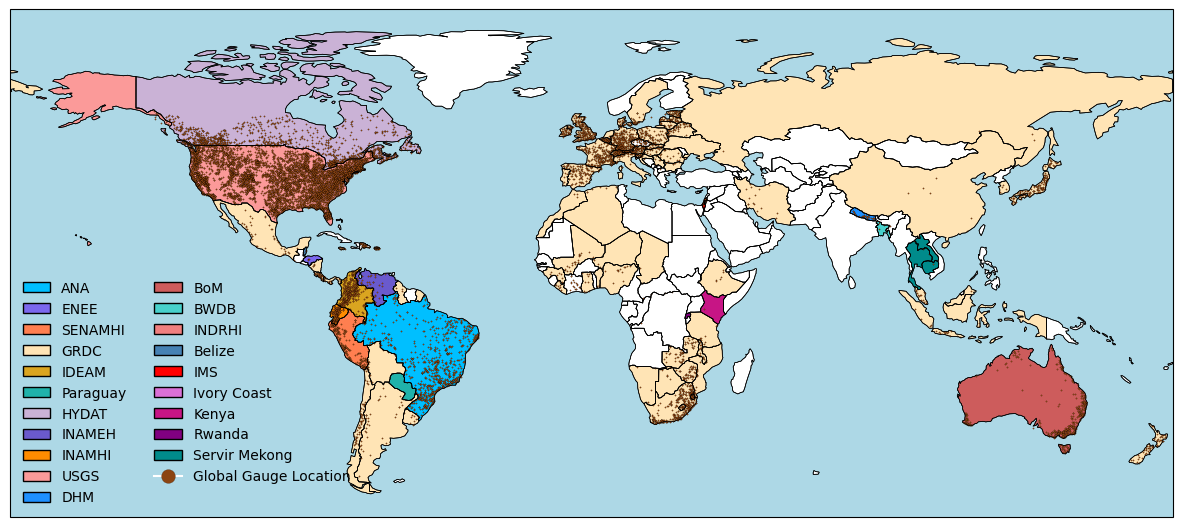

In [8]:
# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# remove antartica
world = world[world.name != "Antarctica"]

# Merge the DataFrame with the world GeoDataFrame on 'state'
world = world.merge(df.drop_duplicates('state'), left_on='name', right_on='state', how='left')

# Assign colors based on county and fill NaN values with a default color
world['color'] = world['county'].map(custom_colors).fillna('white')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
world.boundary.plot(ax=ax, edgecolor='k', linewidth=0.5)
world.plot(color=world['color'], edgecolor='k', linewidth=0.5, ax=ax)

# background colour
ax.set_facecolor('#ADD8E6')  

# Hide axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Create a custom legend
legend_elements = [Patch(facecolor=color, edgecolor='k', label=county) for county, color in custom_colors.items()]

# Add the legend for the spatial location
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='Global Gauge Location',
                              markerfacecolor='saddlebrown', markersize=10, markeredgewidth=0.1, markeredgecolor='black'))

ax.legend(handles=legend_elements, loc='lower left', frameon=False, ncol=2, bbox_to_anchor=(0, 0))

# extract coordinate to plot the gauge location
coordinates = df[['longitude', 'latitude']].values.tolist()
longitudes, latitudes = zip(*coordinates)

# Plot each point from the coordinates list using ax.scatter for solid markers
ax.scatter(longitudes, latitudes, color='saddlebrown', s=1, edgecolor='black', linewidth=0.1, transform=ccrs.PlateCarree())

# Save the plot in high quality
#plt.savefig('/Users/yubinbaaniya/Downloads/world_gauge nad source.png', dpi=600, bbox_inches='tight')
# Show the plot
plt.show()


with histogram

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from matplotlib_scalebar.scalebar import ScaleBar

# Load the two CSV files
file_path_1 = '/Users/yubinbaaniya/Library/CloudStorage/Box-Box/Jorge dessertation/World_Stations_v2.csv'  # Replace with your file path
file_path_2 = '/Users/yubinbaaniya/Library/CloudStorage/Box-Box/Jorge dessertation/New added station.csv' 

In [4]:
 # Replace with your file path

df1 = pd.read_csv(file_path_1, usecols=['Latitude', 'Longitude'])
df2 = pd.read_csv(file_path_2, usecols=['Latitude', 'Longitude'])

/var/folders/0n/296qsft52w53ggpnw204hrxw0000gq/T/ipykernel_2119/3742874098.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/0n/296qsft52w53ggpnw204hrxw0000gq/T/ipykernel_2119/3742874098.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_lat.set_xticklabels([f'{abs(int(val))}' for val in x_ticks])
/var/folders/0n/296qsft52w53ggpnw204hrxw0000gq/T/ipykernel_2119/3742874098.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_lon.set_xticklabels([f'{int(val)}°' for val in x_ticks])


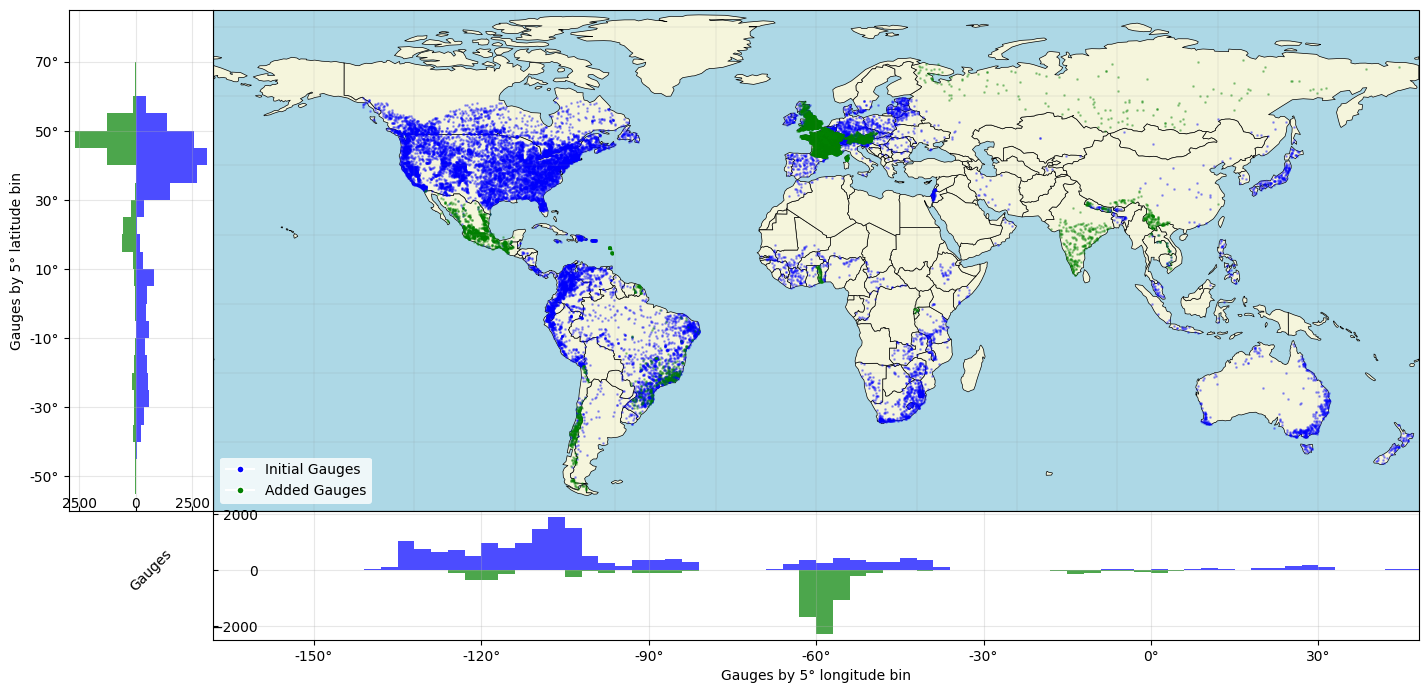

In [6]:
def create_zero_flow_map(zero_flow_data, no_zero_flow_data, title='Zero Flow Observations Distribution'):
    # Create figure with GridSpec
    fig = plt.figure(figsize=(15,7))
    gs = GridSpec(2, 2, width_ratios=[0.6, 5], height_ratios=[3, .77])
    
    # Create the main map
    ax_map = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
    
    # Load and plot world map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world = world[world.name != "Antarctica"]
    world.plot(ax=ax_map, color='beige', edgecolor='black', linewidth=0.5)
    # background colour
    ax_map.set_facecolor('#ADD8E6') 
    
    
    # Plot both datasets
    
    ax_map.scatter(zero_flow_data['Longitude'], zero_flow_data['Latitude'],
                  color='blue', s=1, alpha=0.3, transform=ccrs.PlateCarree(),
                  label='Initial Gauge')
    ax_map.scatter(no_zero_flow_data['Longitude'], no_zero_flow_data['Latitude'],
                  color='green', s=1, alpha=0.3, transform=ccrs.PlateCarree(),
                  label='Added Gauge')
    
    # Create bins for histograms
    lon_bins = np.arange(-180, 181, 5)
    lat_bins = np.arange(-60, 85, 5)
    
    # Create latitude histogram
    ax_lat = fig.add_subplot(gs[0, 0], sharey=ax_map)
    
    # Calculate histograms for latitude
    lat_hist_zero, _ = np.histogram(zero_flow_data['Latitude'], bins=lat_bins)
    lat_hist_no_zero, _ = np.histogram(no_zero_flow_data['Latitude'], bins=lat_bins)
    
    # Plot latitude histograms
    ax_lat.barh(lat_bins[:-1] + 2.5, lat_hist_zero, height=5,
                color='blue', alpha=0.7, label='Initial Gauge')
    ax_lat.barh(lat_bins[:-1] + 2.5, -lat_hist_no_zero, height=5,
                color='green', alpha=0.7, label='Added Gauge')

    # Set y-ticks
    y_ticks = np.arange(-90, 91, 20)  # Define ticks from -90 to 90 at intervals of 20 degrees
    ax_lat.set_yticks(y_ticks)
    ax_lat.set_yticklabels([f'{int(val)}°' for val in y_ticks])

    # Adjust tick parameters to move them inside and change padding
    ax_lat.tick_params(axis="x", direction="in", pad=-10)

    # Set x-tick labels to be positive only
    x_ticks = ax_lat.get_xticks()
    ax_lat.set_xticklabels([f'{abs(int(val))}' for val in x_ticks])

    # Set labels and grid
    ax_lat.set_ylabel('Gauges by 5° latitude bin')
    ax_lat.grid(True, alpha=0.3)
    #ax_lat.legend()
    
    # Create longitude histogram
    ax_lon = fig.add_subplot(gs[1, 1], sharex=ax_map)
    lon_bins = np.arange(-180, 181, 5)
    

    # Calculate histograms for longitude
    lon_hist_zero, _ = np.histogram(zero_flow_data['Longitude'], bins=lon_bins)
    lon_hist_no_zero, _ = np.histogram(no_zero_flow_data['Longitude'], bins=lon_bins)

    # Plot longitude histograms in opposite directions (mirrored format)
    # Initial Gauge - plot positive bars
    ax_lon.bar(lon_bins[:-1] + 2.5, lon_hist_zero, width=5, color='blue', alpha=0.7, label='Initial Gauge')

    # Added Gauge - plot negative bars
    ax_lon.bar(lon_bins[:-1] + 2.5, -lon_hist_no_zero, width=5, color='green', alpha=0.7, label='Added Gauge')
    x_ticks = np.arange(-180, 181, 30)  # Define ticks from -180 to 180 at intervals of 30 degrees
    ax_lon.set_xticklabels([f'{int(val)}°' for val in x_ticks])
    
    ax_lon.tick_params(axis="y", direction="in", pad=-32)


    # Update labels and grid as needed
    ax_lon.set_xlabel('Gauges by 5° longitude bin')
    ax_lon.set_ylabel('Gauges', rotation=45, labelpad=40)
    ax_lon.grid(True, alpha=0.3)
    #ax_lon.legend()
    
    # Set map limits
    ax_map.set_xlim(-180, 180)
    ax_map.set_ylim(-60, 85)
    
    # Add gridlines
    gl = ax_map.gridlines(draw_labels=False, linewidth=0.2,
                         color='gray', alpha=0.5,
                         xlocs=np.arange(-180, 181, 30),
                         ylocs=np.arange(-60, 85, 20))
    gl.top_labels = False
    gl.right_labels = False
    
    # Add map scale
    #scale_bar = ScaleBar(1, location='lower right', box_alpha=0.5)
    #ax_map.add_artist(scale_bar)
    
    # Add legend to map
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',
               label='Initial Gauges', markersize=5),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='green',
               label='Added Gauges', markersize=5)
    ]
    ax_map.legend(handles=legend_elements, loc='lower left', frameon=True,
                 facecolor='white', edgecolor='none')
    
    # Adjust spacing
    #gs.update(wspace=0.1, hspace=0.1)
    # Adjust spacing between subplots
    gs.update(wspace=0.00, hspace=0.00)  # Reduced wspace and hspace to bring histograms closer to the main map
    
    # Optionally use plt.subplots_adjust to fine-tune the space
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    
    return fig

# Usage example:
if __name__ == "__main__":
    # Load your data
    # Assuming you have two CSV files for zero-flow and no-zero-flow observations
    zero_flow_data = pd.read_csv('/Users/yubinbaaniya/Library/CloudStorage/Box-Box/Jorge dessertation/World_Stations_v2.csv')
    no_zero_flow_data = pd.read_csv('/Users/yubinbaaniya/Library/CloudStorage/Box-Box/Jorge dessertation/New added station.csv')
    
    # Create the map
    fig = create_zero_flow_map(zero_flow_data, no_zero_flow_data)
    
    # Add a main title if needed
    #plt.suptitle('Global Distribution of Zero Flow Observations', y=0.95)
    
    # Save the figure
    plt.savefig('/Users/yubinbaaniya/Library/CloudStorage/Box-Box/master thesis and what not/Thesis/plot/world_gauge_with_histogram.png', dpi=1800, bbox_inches='tight')
    
    # Show the plot
    plt.show()
